In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))
import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import time

In [2]:
def parse_category_txt(path: str) -> dict:
    import re

    category_map = {}
    current_key = None

    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue

            # Detekce nového klíče
            if ":" in line:
                # Příklad: "MSZoning: Identifies the zoning..."
                current_key = line.split(":")[0].strip()
                category_map[current_key] = []
            elif current_key:
                # Detekuj platnou hodnotu - první "slovo" na řádku
                parts = re.split(r"\s+", line)
                if parts and len(parts[0]) > 0:
                    # Zajistí, že nepřidáme omylem prázdný řetězec
                    category_map[current_key].append(parts[0])

    return category_map


data_categories = parse_category_txt("data_set\data_description.txt")

In [3]:
len(data_categories.keys())

79

In [ ]:
import pandas as pd
import numpy as np

x_all_cat_df = pd.DataFrame(index=df.index)

for col in data_categories.keys():
    if not col in df.columns:
        print(col)

In [ ]:
# x_all_cat_map = []

# import pandas as pd
# import numpy as np

# x_all_cat_df = pd.DataFrame(index=df.index)

# for col in data_categories.keys():
#     if col in df.columns:
#         x_all_cat_df[col] = df[col]
#     else:
#         x_all_cat_df[col] = np.nan  # nebo třeba "NA", nebo 0
#     # if index == 0:
#     #     break

In [ ]:
data_categories["MSSubClass"]

In [ ]:
list(data_categories.keys())

# Load Data


Load train data


In [4]:
path_train_data = "data_set/train.csv"

df = utils.load_csv_data(path_train_data)

# Print the loaded data
if isinstance(df, pd.DataFrame):
    print(f"dimension train data: {df.shape}")
    print(f"dimension train data: {type(df)}")
else:
    print("train_data is not a DataFrame")

del path_train_data

Successfully loaded data from data_set/train.csv
dimension train data: (1460, 81)
dimension train data: <class 'pandas.core.frame.DataFrame'>


## use One-hot and scaler to prepare train data


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

try:
    del x_encoded
except:
    print()


def ensure_all_dummies(df: pd.DataFrame, data_categories: dict) -> pd.DataFrame:
    """
    Ensures that all expected dummy columns exist in the DataFrame.
    Adds missing columns with zero values in bulk to avoid fragmentation.
    """
    missing_cols = []
    for col, values in data_categories.items():
        for val in values:
            dummy_col = f"{col}_{val}"
            if dummy_col not in df.columns:
                missing_cols.append(dummy_col)

    if missing_cols:
        missing_df = pd.DataFrame(0, index=df.index, columns=missing_cols)
        df = pd.concat([df, missing_df], axis=1)

    return df


# 0. Extract and scale the target column
scaler_sale_price = StandardScaler()
y = scaler_sale_price.fit_transform(df[["SalePrice"]])  # shape: (n_samples, 1)

x = df.copy()
if "SalePrice" in x.columns:
    x = x.drop("SalePrice", axis=1)
if "Id" in x.columns:
    x = x.drop("Id", axis=1)

# 1. Split columns by data type
numerical_cols = x.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = x.select_dtypes(include=["object"]).columns.tolist()

# 2. Handle missing values
x[categorical_cols] = x[categorical_cols].fillna("NA")
x[numerical_cols] = x[numerical_cols].fillna(-1)

for col in data_categories.keys():
    if not col in x.columns:
        print(col)
        break

# 3. One-hot encode categorical features
x_encoded = pd.get_dummies(x, columns=categorical_cols)

# Ensure all dummy columns exist
x_encoded = ensure_all_dummies(x_encoded, data_categories)

# 4. Normalize numerical features
scaler_inputData = StandardScaler()
x_encoded[numerical_cols] = scaler_inputData.fit_transform(x_encoded[numerical_cols])

# 5. Define feature matrix
x = x_encoded

# 6. Split into training and validation sets
x_train_pd, x_val_pd, y_train_pd, y_val_pd = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# 7. Convert to NumPy arrays and cast to float32
x_train = x_train_pd.to_numpy().astype("float32")
x_val = x_val_pd.to_numpy().astype("float32")
y_train = y_train_pd.astype("float32")
y_val = y_val_pd.astype("float32")

# 8. Save original train columns for reuse
train_columns = x_encoded.columns.tolist()

print(x_train.shape)


(1168, 902)


In [ ]:
train_columns

In [ ]:
print(x_train_pd.shape)
print(x_train.shape)
print(x_val_pd.shape)
print(x_val.shape)
print(y_train_pd.shape)
print(y_train.shape)
print(y_val_pd.shape)
print(y_val.shape)

In [ ]:
print(type(x_train_pd))
print(type(x_val_pd))
print(type(y_train_pd))
print(type(y_val_pd))
print(type(x_train))
print(type(x_val))
print(type(y_train))
print(type(y_val))

In [ ]:
print(x_train.shape[1])




Epoch 1/25


19/19 [==============================] - 1s 8ms/step - loss: 1.2447 - mae: 0.8466 - val_loss: 0.9102 - val_mae: 0.6885
Epoch 2/25
19/19 [==============================] - 0s 3ms/step - loss: 0.8176 - mae: 0.6500 - val_loss: 0.8334 - val_mae: 0.6572
Epoch 3/25
19/19 [==============================] - 0s 3ms/step - loss: 0.5579 - mae: 0.5375 - val_loss: 0.8096 - val_mae: 0.6369
Epoch 4/25
19/19 [==============================] - 0s 3ms/step - loss: 0.4428 - mae: 0.4916 - val_loss: 0.7216 - val_mae: 0.5928
Epoch 5/25
19/19 [==============================] - 0s 4ms/step - loss: 0.4912 - mae: 0.4958 - val_loss: 0.7065 - val_mae: 0.5871
Epoch 6/25
19/19 [==============================] - 0s 3ms/step - loss: 0.3890 - mae: 0.4417 - val_loss: 0.6897 - val_mae: 0.5757
Epoch 7/25
19/19 [==============================] - 0s 3ms/step - loss: 0.3151 - mae: 0.4231 - val_loss: 0.6245 - val_mae: 0.5514
Epoch 8/25
19/19 [==============================] - 0s 3ms/step - loss: 0.3018 - mae:

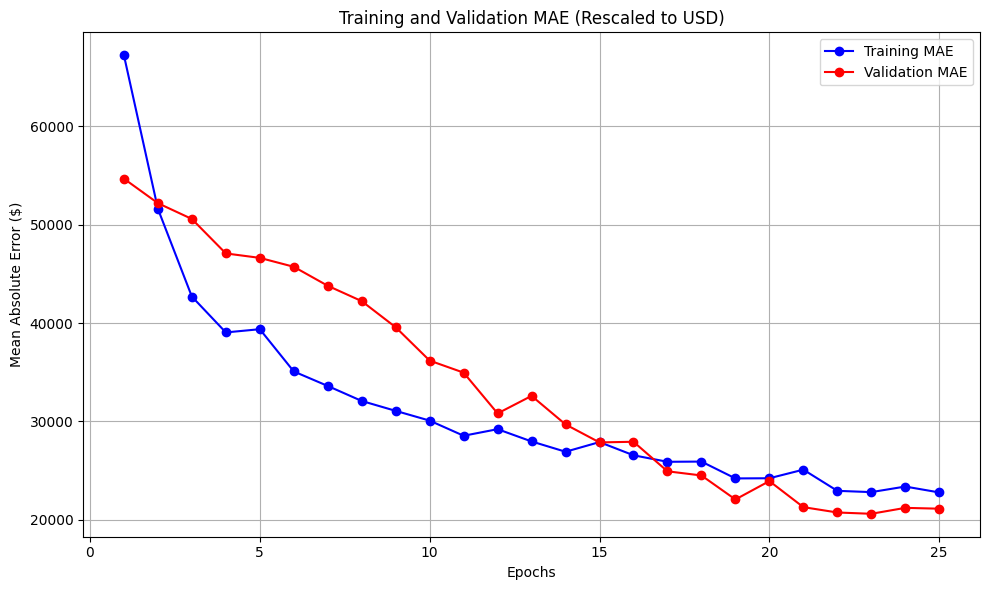

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

start = time.time()

early_stop = EarlyStopping(monitor="val_mae", patience=5, restore_best_weights=True)


model = Sequential(
    [
        Dense(64, activation="relu", input_shape=(x_train.shape[1],)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(32, activation="relu"),
        Dense(1),
    ]
)

# model = Sequential(
#     [
#         Dense(64, activation="relu", input_shape=(x_train.shape[1],)),
#         Dropout(0.4),
#         Dense(32, activation="relu"),
#         Dense(1),
#     ]
# )

model.compile(optimizer="adam", loss="mse", metrics=["mae"])

history = model.fit(
    x_train,
    y_train,
    epochs=25,
    validation_data=(x_val, y_val),
    batch_size=64,
    callbacks=[early_stop],
    # verbose=0,
)

print(f"🕒 Celkový čas trénování: {time.time() - start:.2f} s")

val_mse, val_mae = model.evaluate(x_val, y_val, verbose=0)
print(f"- ✅ finished: val_mae = {val_mae:.2f}")
print(f"- ✅ finished: val_mse = {val_mse:.2f}")

val_mae_usd = val_mae * scaler_sale_price.scale_[0]
val_rmse_usd = (val_mse * (scaler_sale_price.scale_[0] ** 2)) ** 0.5
print(f"- ✅ finished: val_mae = {val_mae:.2f} → ~${val_mae_usd:,.0f}")
print(f"- ✅ finished: val_rmse → ~${val_rmse_usd:,.0f}")


_ = utils.plot_rescaled_history(history.history, metric="mae", scaler=scaler_sale_price)

# Test build model


## Test on validation data


10/10 [==============================] - 0s 0s/step


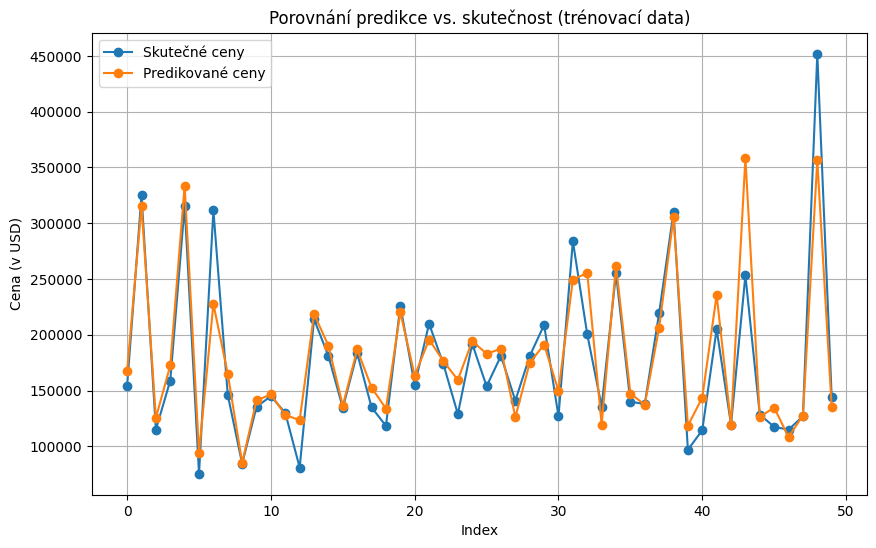

In [7]:
# 11. Předpověď na testovacích datech
y_pred_scaled = model.predict(x_val)

# 12. Inverze zpět na reálné ceny
y_pred_real = scaler_sale_price.inverse_transform(y_pred_scaled)
y_test_real = scaler_sale_price.inverse_transform(y_val.reshape(-1, 1))

# 13. Výstup porovnání
results = pd.DataFrame(
    {"Actual": y_test_real.flatten(), "Predicted": y_pred_real.flatten()}
)

count = 50
# print(results.head(count))

plt.figure(figsize=(10, 6))
plt.plot(results["Actual"][:count], marker="o", label="Skutečné ceny")
plt.plot(results["Predicted"][:count], marker="o", label="Predikované ceny")
plt.title("Porovnání predikce vs. skutečnost (trénovací data)")
plt.xlabel("Index")
plt.ylabel("Cena (v USD)")
plt.legend()
plt.grid(True)
plt.show()

## Test on test data


Load test data


In [8]:
path_test_data = "data_set/test.csv"
path_submission_data = "data_set/sample_submission.csv"

test_data_df = utils.load_csv_data(path_test_data)
y_target_df = utils.load_csv_data(path_submission_data)

# Print the loaded data
if isinstance(test_data_df, pd.DataFrame):
    print(f"dimension train data: {test_data_df.shape}")
    print(f"dimension train data: {type(test_data_df)}")
else:
    print("train_data is not a DataFrame")

# Print the loaded data
if isinstance(y_target_df, pd.DataFrame):
    print(f"dimension train data: {y_target_df.shape}")
    print(f"dimension train data: {type(y_target_df)}")
else:
    print("train_data is not a DataFrame")

del path_test_data, path_submission_data

Successfully loaded data from data_set/test.csv
Successfully loaded data from data_set/sample_submission.csv
dimension train data: (1459, 80)
dimension train data: <class 'pandas.core.frame.DataFrame'>
dimension train data: (1459, 2)
dimension train data: <class 'pandas.core.frame.DataFrame'>


In [12]:
print(type(test_data_df))
print(type(y_target_df))
print(test_data_df.shape)
print(y_target_df.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(1459, 80)
(1459, 2)


In [31]:
try:
    del x_target_encoded
except:
    print()


x_target = test_data_df.copy()

# 1. Drop nepotřebné sloupce
if "SalePrice" in x_target.columns:
    x_target = x_target.drop("SalePrice", axis=1)
if "Id" in x_target.columns:
    x_target = x_target.drop("Id", axis=1)

# 2. Missing values
x_target[categorical_cols] = x_target[categorical_cols].fillna("NA")
x_target[numerical_cols] = x_target[numerical_cols].fillna(-1)

# 3. One-hot encoding
x_target_encoded = pd.get_dummies(x_target, columns=categorical_cols)

# 4. Doplnění chybějících dummy sloupců
x_target_encoded = ensure_all_dummies(x_target_encoded, data_categories)

# 5. Znovu uspořádat a doplnit sloupce přesně podle train_columns
x_target_encoded = x_target_encoded.reindex(columns=train_columns, fill_value=0)

x_target_encoded[numerical_cols] = (
    x_target_encoded[numerical_cols].apply(pd.to_numeric, errors="coerce").fillna(-1)
)


x_target_encoded[numerical_cols] = scaler_inputData.transform(
    x_target_encoded[numerical_cols]
)

x_target_df = x_target_encoded.copy()

if "Id" in y_target_df.columns:
    y_target_df = y_target_df.drop("Id", axis=1)
y_target = y_target_df.to_numpy().astype("float32")

x_target = x_target_df.to_numpy().astype("float32")

In [32]:
print(type(x_target))
print(type(y_target))
print(type(x_target_df))
print(x_target.shape)
print(y_target.shape)
print(x_target_df.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
(1459, 79)
(1459, 1)
(1459, 902)


46/46 [==============================] - 0s 711us/step
           Actual      Predicted
0   169277.046875  132381.187500
1   187758.390625   88892.484375
2   183583.687500  173324.343750
3   179317.484375  191790.265625
4   150730.078125  184135.203125
5   177150.984375  166232.968750
6   172070.656250  165969.640625
7   175110.953125  167365.031250
8   162011.703125  178308.593750
9   160726.250000  133119.359375
10  157933.281250  198444.312500
11  145291.250000  104318.367188
12  159672.015625  114657.976562
13  164167.515625  165424.093750
14  150891.640625  138053.046875
15  179460.968750  333351.468750
16  185034.625000  261695.875000
17  182352.187500  286785.968750
18  183053.453125  292955.343750
19  187823.343750  390305.656250
20  186544.109375  289368.031250
21  158230.781250  200921.421875
22  190552.828125  184455.906250
23  147183.671875  176410.671875
24  185855.296875  169983.250000
25  174350.468750  186938.578125
26  201740.625000  292527.062500
27  162986.375000  23

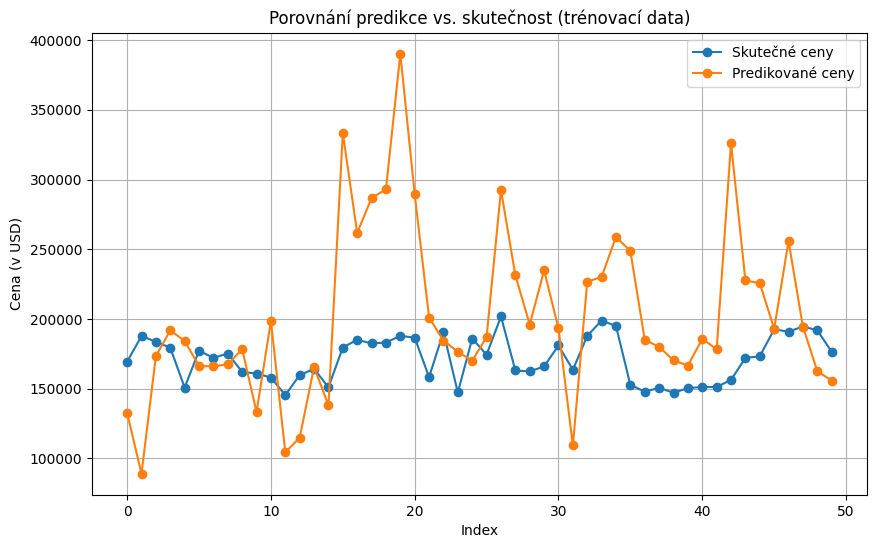

In [41]:
y_pred_scaled = model.predict(x_target)

y_pred_real = scaler_sale_price.inverse_transform(y_pred_scaled)
y_test_real = y_target.reshape(-1, 1)

results = pd.DataFrame(
    {"Actual": y_test_real.flatten(), "Predicted": y_pred_real.flatten()}
)

count = 50
print(results.head(count))

plt.figure(figsize=(10, 6))
plt.plot(results["Actual"][:count], marker="o", label="Skutečné ceny")
plt.plot(results["Predicted"][:count], marker="o", label="Predikované ceny")
plt.title("Porovnání predikce vs. skutečnost (trénovací data)")
plt.xlabel("Index")
plt.ylabel("Cena (v USD)")
plt.legend()
plt.grid(True)
plt.show()